In [1]:
import random
import numpy as np
from scipy.interpolate import Rbf
import rbf
from rbf.interpolate import RBFInterpolant
from rbf.pde.nodes import disperse, poisson_disc_nodes
import matplotlib.pyplot as plt
from matplotlib import cm

local_seed = 13
local_random = random.Random()
local_random.seed(local_seed)


def rotate2d(theta):
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    return R

In [8]:
nmodules = 10

field_width_params = [35.0, 0.32]
field_width        = lambda x: 40. + field_width_params[0] * (np.exp(x / field_width_params[1]) - 1.)

module_grid_orientation   = [local_random.uniform(0, np.pi/3.) for i in xrange(nmodules)]
module_grid_spacing       = [field_width( float(i) / float(nmodules) ) for i in xrange(nmodules)]

peak_rate = 20.

In [3]:
grid_spacing     = module_grid_spacing[0]
grid_orientation = module_grid_orientation[0]

print('grid spacing: %.02f' % grid_spacing)
print('grid orientation: %.02f' % grid_orientation)

grid spacing: 40.00
grid orientation: 0.27


In [4]:
arena_dimension = 100
vert = np.array([[-arena_dimension,-arena_dimension],[-arena_dimension,arena_dimension],
                    [arena_dimension,arena_dimension],[arena_dimension,-arena_dimension]])
smp = np.array([[0,1],[1,2],[2,3],[3,0]])


nodes, groups, _ = poisson_disc_nodes(float(grid_spacing), (vert, smp))



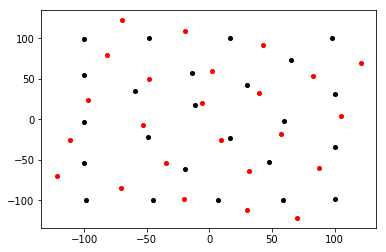

In [5]:

rot = rotate2d(-grid_orientation)
rnodes = np.dot(rot, nodes.T).T

fig, ax = plt.subplots()
ax.plot(nodes[:, 0], nodes[:, 1], 'ko', markersize=4)
ax.plot(rnodes[:, 0], rnodes[:, 1], 'ro', markersize=4)

(24,)
(200, 200)
(200, 200)
(200, 200)
0.0049817544347848484
19.998083993552672


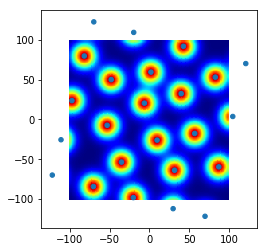

In [49]:

x_obs = rnodes
u_obs = peak_rate * np.ones(len(x_obs))
print u_obs.shape

ip2  = Rbf(x_obs[:,0], x_obs[:,1], u_obs, function='gaussian', epsilon=grid_spacing/2.71828)

arena_x = np.arange(-100, 100, 1)
arena_y = np.arange(-100, 100, 1)

xx, yy = np.meshgrid(arena_x, arena_y, indexing='ij')
zz2 = ip2(xx, yy)
print xx.shape
print yy.shape
print zz2.shape
print np.min(zz2.ravel())
print np.max(zz2.ravel())
plt.pcolor(xx, yy, zz2,cmap=cm.jet)
plt.scatter(x_obs[:,0], x_obs[:,1], u_obs, cmap=cm.jet)
ax = plt.gca()
ax.set_aspect('equal')

(24,)
[[-100 -100]
 [ -99 -100]
 [ -98 -100]
 ...
 [  97   99]
 [  98   99]
 [  99   99]]
19.999999999999993
20.000000000000007


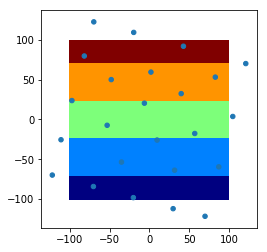

In [48]:
x_obs = rnodes
u_obs = peak_rate * np.ones(len(x_obs))
print u_obs.shape

ip1  = RBFInterpolant(x_obs, u_obs, sigma=0.1, phi='exp')

arena_x = np.arange(-100, 100, 1)
arena_y = np.arange(-100, 100, 1)

xx, yy = np.meshgrid(arena_x, arena_y)
coords = np.column_stack((xx.ravel(), yy.ravel()))
print coords
zz1 = ip1(coords)
print np.min(zz1)
print np.max(zz1)
plt.pcolor(xx, yy, zz1.reshape(xx.shape), cmap=cm.jet)
plt.scatter(x_obs[:,0], x_obs[:,1], u_obs, cmap=cm.jet)
ax = plt.gca()
ax.set_aspect('equal')